<a href="https://colab.research.google.com/github/Govardhanaraokotla/Email-Marketing-Campaign/blob/main/Email_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving email_opened_table.csv to email_opened_table.csv
Saving email_table.csv to email_table.csv
Saving link_clicked_table.csv to link_clicked_table.csv


In [4]:
import pandas as pd

email_df = pd.read_csv("email_table.csv")
opened_df = pd.read_csv("email_opened_table.csv")
clicked_df = pd.read_csv("link_clicked_table.csv")


In [5]:
# Display basic information
email_df_info = email_df.info()
opened_df_info = opened_df.info()
clicked_df_info = clicked_df.info()

# Display first few rows
email_df_head = email_df.head()
opened_df_head = opened_df.head()
clicked_df_head = clicked_df.head()

email_df_info, email_df_head, opened_df_info, opened_df_head, clicked_df_info, clicked_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Cou

(None,
    email_id   email_text email_version  hour    weekday user_country  \
 0     85120  short_email  personalized     2     Sunday           US   
 1    966622   long_email  personalized    12     Sunday           UK   
 2    777221   long_email  personalized    11  Wednesday           US   
 3    493711  short_email       generic     6     Monday           UK   
 4    106887   long_email       generic    14     Monday           US   
 
    user_past_purchases  
 0                    5  
 1                    2  
 2                    2  
 3                    1  
 4                    6  ,
 None,
    email_id
 0    284534
 1    609056
 2    220820
 3    905936
 4    164034,
 None,
    email_id
 0    609056
 1    870980
 2    935124
 3    158501
 4    177561)

In [6]:
# Total emails sent
total_emails = len(email_df)

# Opened and clicked counts
opened_count = len(opened_df)
clicked_count = len(clicked_df)

# Merge for click-to-open rate
opened_email_ids = set(opened_df['email_id'])
clicked_email_ids = set(clicked_df['email_id'])

# Intersect for click-to-open
clicked_and_opened = len(opened_email_ids & clicked_email_ids)

# Calculate rates
open_rate = opened_count / total_emails
click_rate = clicked_count / total_emails
click_to_open_rate = clicked_and_opened / opened_count

open_rate, click_rate, click_to_open_rate


(0.10345, 0.02119, 0.2)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Add labels to the main email dataframe
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Step 2: Features and Label
features = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']
X = email_df[features]
y = email_df['clicked']

# Step 3: Preprocessing (One-hot encode categorical columns)
categorical_features = ['email_text', 'email_version', 'weekday', 'user_country']
numerical_features = ['hour', 'user_past_purchases']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Step 4: Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit the model
pipeline.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

classification = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

classification, roc_auc


({'0': {'precision': 0.9775224524609905,
   'recall': 0.9967258402823963,
   'f1-score': 0.987030751304524,
   'support': 19547.0},
  '1': {'precision': 0.07246376811594203,
   'recall': 0.011037527593818985,
   'f1-score': 0.019157088122605363,
   'support': 453.0},
  'accuracy': 0.9744,
  'macro avg': {'precision': 0.5249931102884663,
   'recall': 0.5038816839381076,
   'f1-score': 0.5030939197135647,
   'support': 20000.0},
  'weighted avg': {'precision': 0.957022873260575,
   'recall': 0.9744,
   'f1-score': 0.9651084128334534,
   'support': 20000.0}},
 np.float64(0.5864038462342024))

In [8]:
# Add binary indicators for opened and clicked
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Segment Analysis
segment_analysis = {}

# Email Text Type
segment_analysis['email_text'] = email_df.groupby('email_text')[['opened', 'clicked']].mean() * 100

# Email Version
segment_analysis['email_version'] = email_df.groupby('email_version')[['opened', 'clicked']].mean() * 100

# Weekday
segment_analysis['weekday'] = email_df.groupby('weekday')[['opened', 'clicked']].mean() * 100

# Hour
segment_analysis['hour'] = email_df.groupby('hour')[['opened', 'clicked']].mean() * 100

# Country
segment_analysis['user_country'] = email_df.groupby('user_country')[['opened', 'clicked']].mean().sort_values(by='clicked', ascending=False) * 100

# Bucket Past Purchases
email_df['purchase_bucket'] = pd.cut(email_df['user_past_purchases'], bins=[-1, 0, 1, 5, 10, 50, 100], labels=["0", "1", "2-5", "6-10", "11-50", "51+"])
segment_analysis['user_past_purchases'] = email_df.groupby('purchase_bucket')[['opened', 'clicked']].mean() * 100

# Display segment analysis results
for segment, data in segment_analysis.items():
    print(f"\nSegment: {segment}\n")
    print(data)



Segment: email_text

                opened   clicked
email_text                      
long_email    9.117670  1.853767
short_email  11.585954  2.387177

Segment: email_version

                  opened   clicked
email_version                     
generic         7.934832  1.513673
personalized   12.775401  2.729409

Segment: weekday

              opened   clicked
weekday                       
Friday      7.413416  1.403682
Monday     11.606210  2.290608
Saturday    8.765186  1.784611
Sunday      8.764857  1.675123
Thursday   11.844225  2.444491
Tuesday    12.048363  2.488864
Wednesday  12.027833  2.761999

Segment: hour

         opened   clicked
hour                     
1      8.842027  1.812801
2      8.786725  1.632209
3      8.459870  1.952278
4      8.822483  1.618641
5      8.212487  1.801252
6      9.028801  1.714668
7      9.007801  1.828376
8      8.847345  1.893308
9     12.568883  2.579435
10    13.239609  2.823961
11    12.655352  2.712816
12    12.446220  2.566073
13 

<ipython-input-8-3ddfaab8d637>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis['user_past_purchases'] = email_df.groupby('purchase_bucket')[['opened', 'clicked']].mean() * 100


In [11]:
import pandas as pd


# Mark opened and clicked
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# List of segments to analyze
segments = ['email_text', 'email_version', 'weekday', 'hour', 'user_country']

# Perform analysis for each segment
for segment in segments:
    print(f"\n====== Segment Analysis by: {segment.upper()} ======")
    grouped = email_df.groupby(segment).agg(
        total_sent=('email_id', 'count'),
        open_rate=('opened', 'mean'),
        click_through_rate=('clicked', 'mean')
    ).reset_index()

    # Convert to percentage
    grouped['open_rate'] = (grouped['open_rate'] * 100).round(2)
    grouped['click_through_rate'] = (grouped['click_through_rate'] * 100).round(2)

    print(grouped.sort_values(by='click_through_rate', ascending=False))



====== Segment Analysis by: EMAIL_TEXT ======
    email_text  total_sent  open_rate  click_through_rate
1  short_email       49724      11.59                2.39
0   long_email       50276       9.12                1.85

====== Segment Analysis by: EMAIL_VERSION ======
  email_version  total_sent  open_rate  click_through_rate
1  personalized       49791      12.78                2.73
0       generic       50209       7.93                1.51

====== Segment Analysis by: WEEKDAY ======
     weekday  total_sent  open_rate  click_through_rate
6  Wednesday       14084      12.03                2.76
5    Tuesday       14143      12.05                2.49
4   Thursday       14277      11.84                2.44
1     Monday       14363      11.61                2.29
2   Saturday       14569       8.77                1.78
3     Sunday       14387       8.76                1.68
0     Friday       14177       7.41                1.40

====== Segment Analysis by: HOUR ======
    hour  total_sen

In [12]:
import pandas as pd


# Merge opened and clicked info into email_df
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Segment Analysis: CTR and Open Rate by different features
segments = ['email_text', 'email_version', 'weekday', 'hour', 'user_country']

segment_analysis = {}
for segment in segments:
    grouped = email_df.groupby(segment).agg(
        sent=('email_id', 'count'),
        opened=('opened', 'mean'),
        clicked=('clicked', 'mean')
    ).reset_index()
    grouped['opened'] = grouped['opened'] * 100  # convert to percentage
    grouped['clicked'] = grouped['clicked'] * 100  # convert to percentage
    segment_analysis[segment] = grouped.sort_values(by='clicked', ascending=False)

segment_analysis.keys()  # To list available segments for user to inspect



dict_keys(['email_text', 'email_version', 'weekday', 'hour', 'user_country'])

<ipython-input-13-ead1c068d3be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
<ipython-input-13-ead1c068d3be>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')


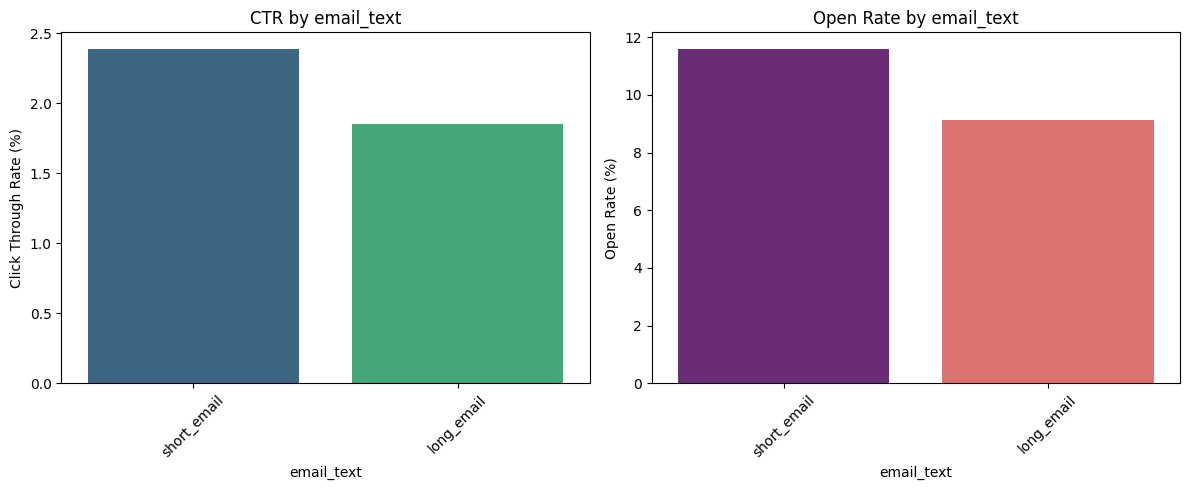

<ipython-input-13-ead1c068d3be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
<ipython-input-13-ead1c068d3be>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')


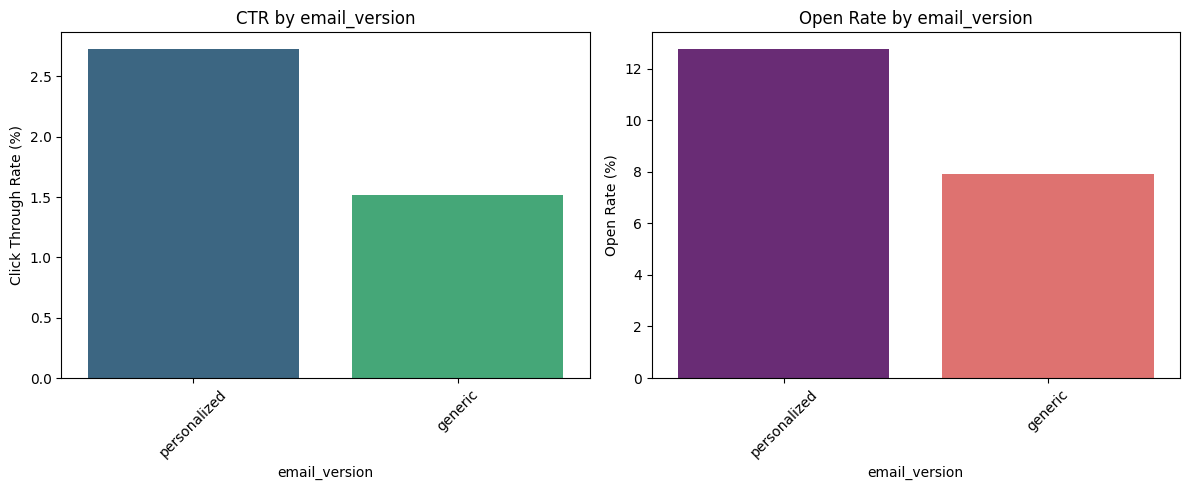

<ipython-input-13-ead1c068d3be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
<ipython-input-13-ead1c068d3be>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')


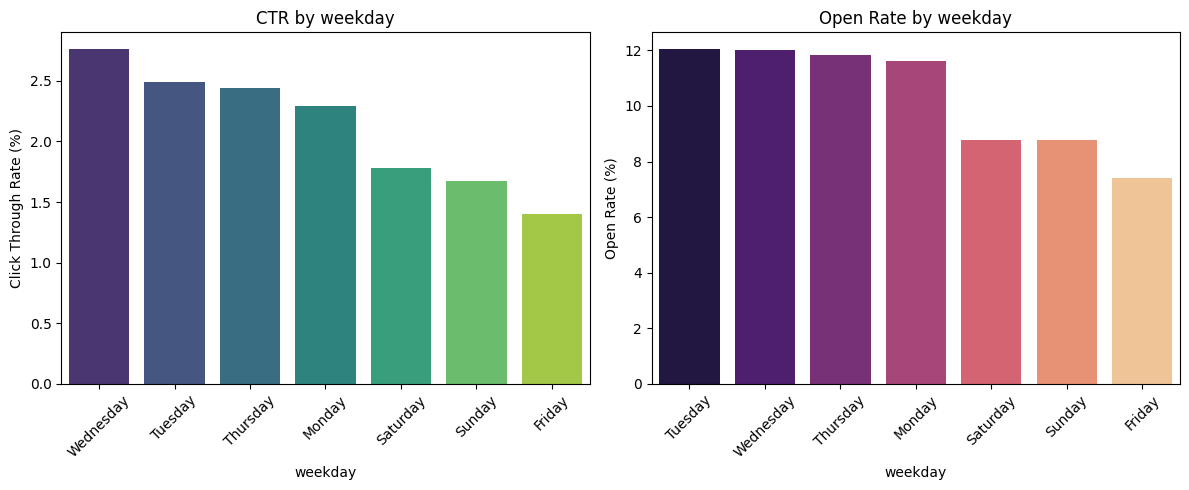

<ipython-input-13-ead1c068d3be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
<ipython-input-13-ead1c068d3be>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')


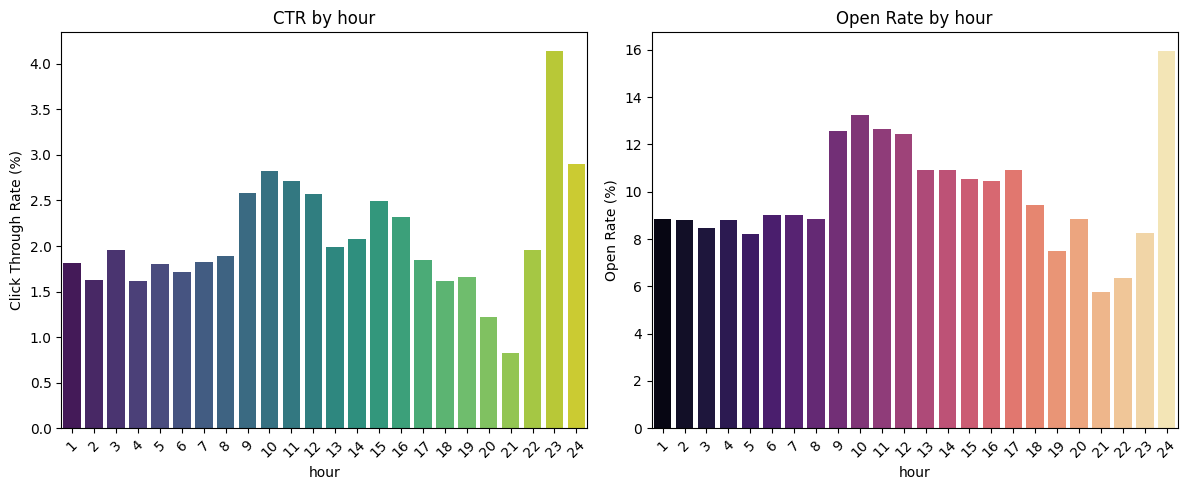

<ipython-input-13-ead1c068d3be>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
<ipython-input-13-ead1c068d3be>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')


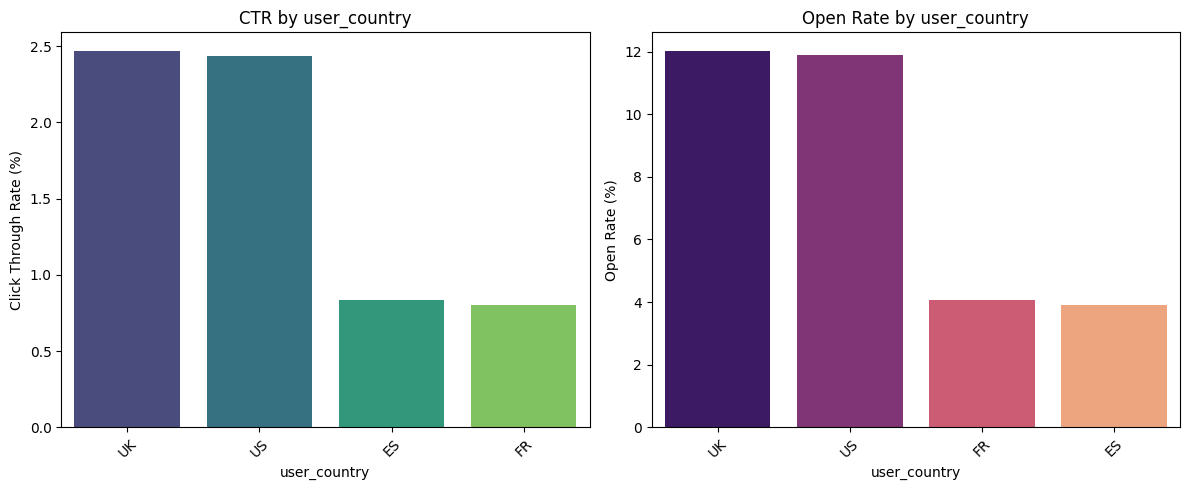

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (you may skip this if already loaded in your Colab)
email_df = pd.read_csv("email_table.csv")
opened_df = pd.read_csv("email_opened_table.csv")
clicked_df = pd.read_csv("link_clicked_table.csv")

# Mark opened and clicked
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# List of segments to visualize
segments = ['email_text', 'email_version', 'weekday', 'hour', 'user_country']

# Function to plot segment performance
def plot_segment_performance(segment):
    data = email_df.groupby(segment).agg(
        sent=('email_id', 'count'),
        open_rate=('opened', 'mean'),
        ctr=('clicked', 'mean')
    ).reset_index()

    data['open_rate'] *= 100
    data['ctr'] *= 100

    plt.figure(figsize=(12, 5))

    # CTR Bar Plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=segment, y='ctr', data=data.sort_values(by='ctr', ascending=False), palette='viridis')
    plt.title(f'CTR by {segment}')
    plt.ylabel('Click Through Rate (%)')
    plt.xticks(rotation=45)

    # Open Rate Bar Plot
    plt.subplot(1, 2, 2)
    sns.barplot(x=segment, y='open_rate', data=data.sort_values(by='open_rate', ascending=False), palette='magma')
    plt.title(f'Open Rate by {segment}')
    plt.ylabel('Open Rate (%)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for each segment
for segment in segments:
    plot_segment_performance(segment)
